In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [117]:
df=pd.read_csv("C:\\Users\\ASUS\\Desktop\\Matchine learning\\Data sets\\covid india 19.csv")
df.head(200)

,Sno,Date,Time,UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,3/2/2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
195,196,18/03/20,6:00 PM,Karnataka,11,0,0,1,11
196,197,18/03/20,6:00 PM,Kerala,25,2,3,0,27
197,198,18/03/20,6:00 PM,Maharashtra,39,3,0,1,42
198,199,18/03/20,6:00 PM,Odisha,1,0,0,0,1


In [118]:
df=df.drop(columns=["Sno"])

In [119]:
df1=df[531:]

In [120]:
df1.describe()

,Cured,Deaths,Confirmed
count,8.760000e+03,8760.000000,8.760000e+03
mean,8.339900e+04,1577.771575,9.740566e+04
std,1.978756e+05,4839.924891,2.218519e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.720000e+02,5.000000,1.045250e+03
50%,5.635000e+03,94.000000,8.755500e+03
75%,6.854450e+04,997.750000,9.223250e+04
max,1.737080e+06,47827.000000,1.859367e+06


In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 531 to 9290
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      8760 non-null   object
 1   Time                      8760 non-null   object
 2   UnionTerritory            8760 non-null   object
 3   ConfirmedIndianNational   8760 non-null   object
 4   ConfirmedForeignNational  8760 non-null   object
 5   Cured                     8760 non-null   int64 
 6   Deaths                    8760 non-null   int64 
 7   Confirmed                 8760 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 547.6+ KB


In [122]:
df.replace('-',0)
df.tail()

,Date,Time,UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9/12/2020,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9/12/2020,8:00 AM,Tripura,-,-,32169,373,32945
9288,9/12/2020,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9/12/2020,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9/12/2020,8:00 AM,West Bengal,-,-,475425,8820,507995


In [123]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1[["ConfirmedIndianNational","ConfirmedForeignNational"]]=df1[["ConfirmedIndianNational","ConfirmedForeignNational"]].apply(le.fit_transform)
#df[["Gender"]]=le.fit_transform(df[["Gender"]])
df1[["ConfirmedIndianNational","ConfirmedForeignNational"]]

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ConfirmedIndianNational,ConfirmedForeignNational
531,0,0
532,0,0
533,0,0
534,0,0
535,0,0
...,...,...
9286,0,0
9287,0,0
9288,0,0
9289,0,0


In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 531 to 9290
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      8760 non-null   object
 1   Time                      8760 non-null   object
 2   UnionTerritory            8760 non-null   object
 3   ConfirmedIndianNational   8760 non-null   int32 
 4   ConfirmedForeignNational  8760 non-null   int32 
 5   Cured                     8760 non-null   int64 
 6   Deaths                    8760 non-null   int64 
 7   Confirmed                 8760 non-null   int64 
dtypes: int32(2), int64(3), object(3)
memory usage: 479.2+ KB


In [125]:
df1['Date']= pd.to_datetime(df1['Date'])          # Date is converted to DateTime format.
df1 = df1[df1['Date'].dt.year==2020]
df1

<ipython-input-125-a6f1d3de828b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']= pd.to_datetime(df1['Date'])          # Date is converted to DateTime format.


,Date,Time,UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
531,2020-01-04,7:30 PM,Assam,0,0,0,0,1
532,2020-01-04,7:30 PM,Bihar,0,0,0,1,23
533,2020-01-04,7:30 PM,Chandigarh,0,0,0,0,16
534,2020-01-04,7:30 PM,Chhattisgarh,0,0,2,0,9
535,2020-01-04,7:30 PM,Delhi,0,0,6,2,152
...,...,...,...,...,...,...,...,...
9286,2020-09-12,8:00 AM,Telengana,0,0,266120,1480,275261
9287,2020-09-12,8:00 AM,Tripura,0,0,32169,373,32945
9288,2020-09-12,8:00 AM,Uttarakhand,0,0,72435,1307,79141
9289,2020-09-12,8:00 AM,Uttar Pradesh,0,0,528832,7967,558173


In [126]:
df1['month']=df1['Date'].dt.month
df1['month']
df1

,Date,Time,UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,month
531,2020-01-04,7:30 PM,Assam,0,0,0,0,1,1
532,2020-01-04,7:30 PM,Bihar,0,0,0,1,23,1
533,2020-01-04,7:30 PM,Chandigarh,0,0,0,0,16,1
534,2020-01-04,7:30 PM,Chhattisgarh,0,0,2,0,9,1
535,2020-01-04,7:30 PM,Delhi,0,0,6,2,152,1
...,...,...,...,...,...,...,...,...,...
9286,2020-09-12,8:00 AM,Telengana,0,0,266120,1480,275261,9
9287,2020-09-12,8:00 AM,Tripura,0,0,32169,373,32945,9
9288,2020-09-12,8:00 AM,Uttarakhand,0,0,72435,1307,79141,9
9289,2020-09-12,8:00 AM,Uttar Pradesh,0,0,528832,7967,558173,9


In [75]:
df2=df1.head(500)

<AxesSubplot:>

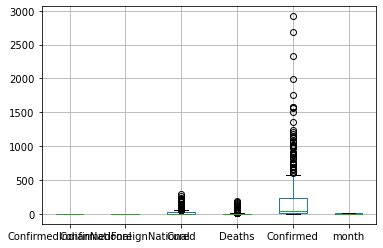

In [76]:
df2.boxplot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

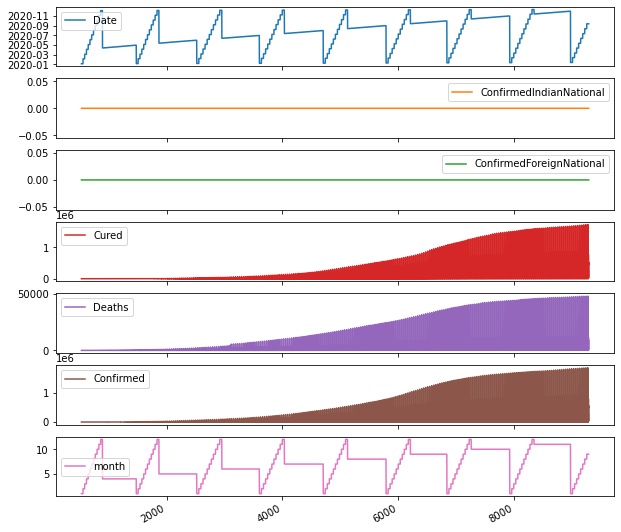

In [78]:
df1.plot(subplots=True,figsize=(10,10))

In [79]:
#sns.catplot(x="Cured",data=df1,kind="count",hue="UnionTerritory")

In [80]:
#sns.catplot(x="Deaths",data=df1,kind="count",hue="UnionTerritory")

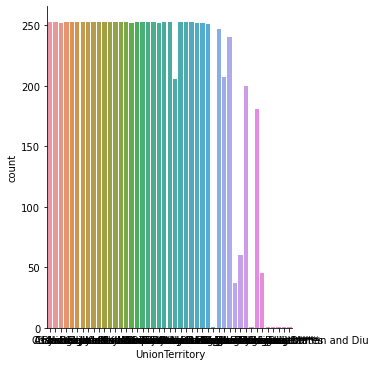

In [81]:
sns.catplot(x="UnionTerritory",data=df1,kind="count")

<AxesSubplot:xlabel='Cured', ylabel='UnionTerritory'>

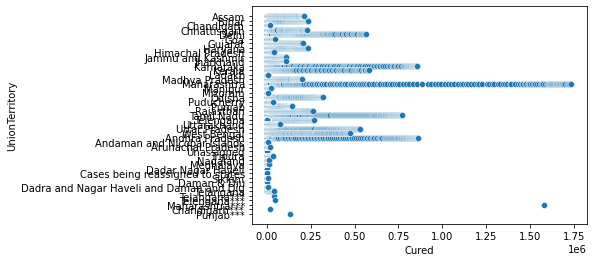

In [82]:
sns.scatterplot(x="Cured",y="UnionTerritory",sizes=(20,15) ,data=df1,marker="o")

In [83]:
#help(sns.scatterplot)

<AxesSubplot:xlabel='Cured', ylabel='Deaths'>

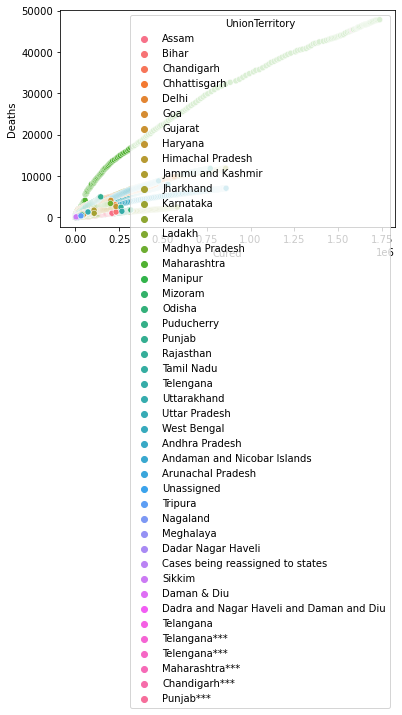

In [84]:
sns.scatterplot(x="Cured",y="Deaths",data=df1,hue="UnionTerritory")

<AxesSubplot:xlabel='Confirmed', ylabel='Count'>

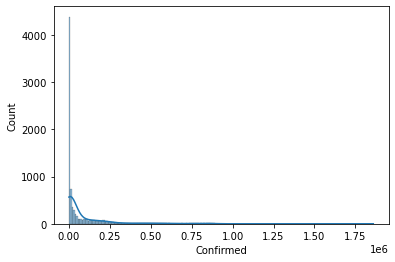

In [85]:
#sns.histplot(x="Confirmed",data=df1)
#df1["Confirmed"].hist(grid=0)
sns.histplot(x="Confirmed",data=df1,kde=True)

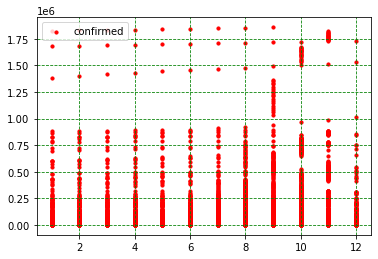

In [86]:
x=df1.month
y=df1.Confirmed
plt.scatter(x,y,s=10,color="r",label="confirmed")
plt.legend()
plt.grid(linestyle="--",color="g")

array([[<AxesSubplot:title={'center':'ConfirmedIndianNational'}>,
        <AxesSubplot:title={'center':'ConfirmedForeignNational'}>],
       [<AxesSubplot:title={'center':'Cured'}>,
        <AxesSubplot:title={'center':'Deaths'}>],
       [<AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

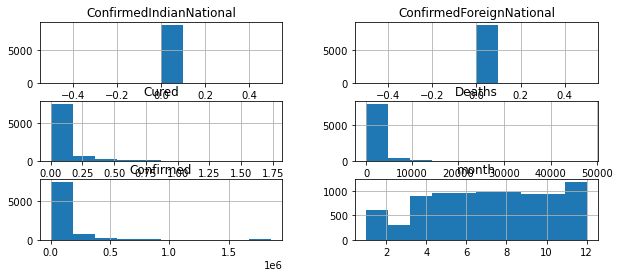

In [87]:
df1.hist(figsize=(10,4))

In [88]:
confirm= df1['Confirmed'].groupby(df1['month']).sum()
cured= df1['Cured'].groupby(df1['month']).sum()      # creating instances for 'confirmed','deaths','discharged' by month column
death= df1['Deaths'].groupby(df1['month']).sum()


In [89]:
confirm.sum()

853273561

In [90]:
cols=[confirm,cured,death]
df1.total=pd.concat(cols,axis=1) 
df1.total

<ipython-input-90-e45440da7f7f>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.total=pd.concat(cols,axis=1)


,Confirmed,Cured,Deaths
month,,,
1,30159370,26037561,484196
2,30485613,26342554,488902
3,30809062,26652140,493494
4,31504839,27031699,509867
5,33795008,28230701,572572
6,39457755,31849079,746144
7,55350416,42653851,1067029
8,89165453,70493254,1576520
9,132000719,108486217,2111081


In [91]:
#plt.figure(figsize=(10,5))
#sns.barplot(x='Confirmed',y='month',data=df1)

In [92]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be help

<AxesSubplot:xlabel='month', ylabel='Cured'>

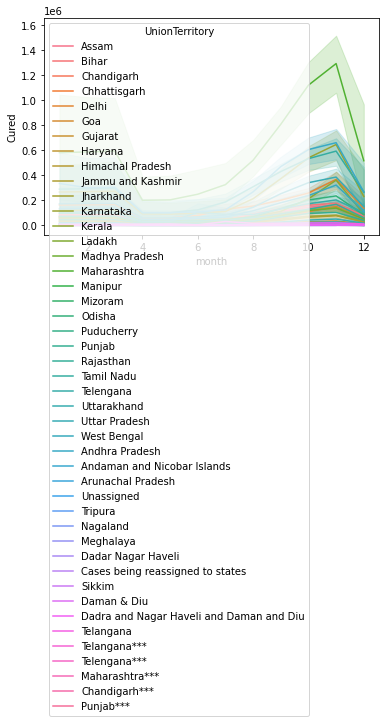

In [93]:
#plt.figure(figsize=(10,5))
sns.lineplot(x="month",y="Cured",data=df1,hue="UnionTerritory",markers=True)

In [94]:
months  = df1 ['month'].tolist()
cured   = df1 ['Cured'].tolist()
death   = df1 ['Deaths'].tolist()
Confirm = df1 ['Confirmed'].tolist()


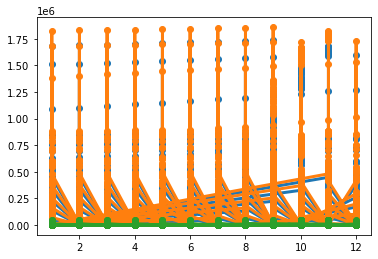

In [95]:
plt.plot(months, cured,   marker='o', linewidth=3)
plt.plot(months, Confirm,   marker='o', linewidth=3)
plt.plot(months, death,   marker='o', linewidth=3)

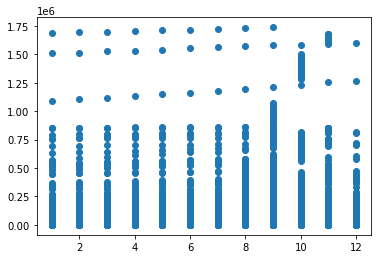

In [96]:
plt.scatter(months,cured)

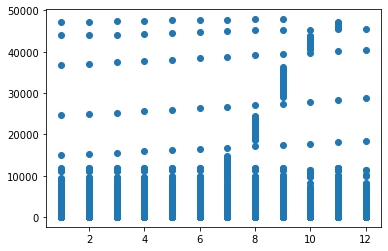

In [97]:
plt.scatter(months,death)

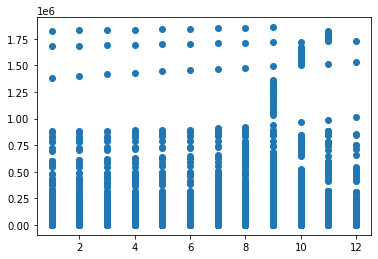

In [98]:
plt.scatter(months,Confirm)

In [99]:
months  = df1 ['month'].tolist()
cured   = df1['Cured'].tolist()
death   = df1 ['Deaths'].tolist()
Confirm = df1 ['Confirmed'].tolist()


<BarContainer object of 8760 artists>

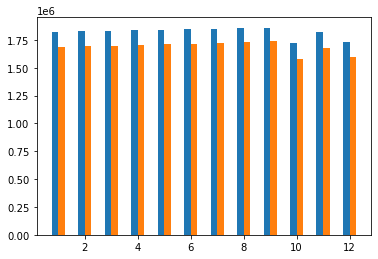

In [100]:
plt.bar([a-0.25 for a in months], Confirm, width= 0.25, label = 'confirm',align='edge')
plt.bar([a+0.25 for a in months], cured, width= -0.25, label = 'cured',align='edge')

<BarContainer object of 8760 artists>

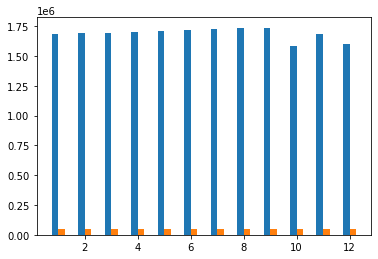

In [101]:
plt.bar([a-0.25 for a in months], cured, width= 0.25, label = 'cured', align='edge')
plt.bar([a+0.25 for a in months], death, width= -0.25, label = 'deaths', align='edge')

In [102]:
months  = df1 ['month'].tolist()
cured   = df1 ['Cured'].tolist()
death   = df1 ['Deaths'].tolist()


Text(0.5, 1.0, 'people whos are died')

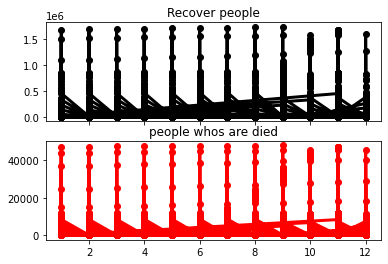

In [103]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(months, cured, label = 'cured', color='k', marker='o', linewidth=3)
axarr[0].set_title('Recover people')
axarr[1].plot(months, death, label = 'Death', color='r', marker='o', linewidth=3)
axarr[1].set_title('people whos are died')

In [104]:
df= df[df['Date']=="25/04/20"]
df.head()

,Date,Time,UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1286,25/04/20,5:00 PM,Andaman and Nicobar Islands,-,-,11,0,27
1287,25/04/20,5:00 PM,Andhra Pradesh,-,-,171,31,1061
1288,25/04/20,5:00 PM,Arunachal Pradesh,-,-,1,0,1
1289,25/04/20,5:00 PM,Assam,-,-,19,1,36
1290,25/04/20,5:00 PM,Bihar,-,-,46,2,228


<BarContainer object of 5 artists>

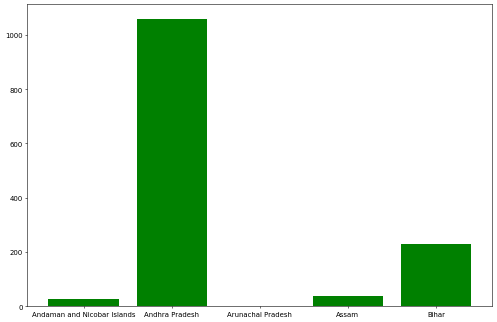

In [106]:
state= df.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,8), dpi=50)
plt.bar(df['UnionTerritory'][:5], df['Confirmed'][:5],align='center',color='g')

<AxesSubplot:>

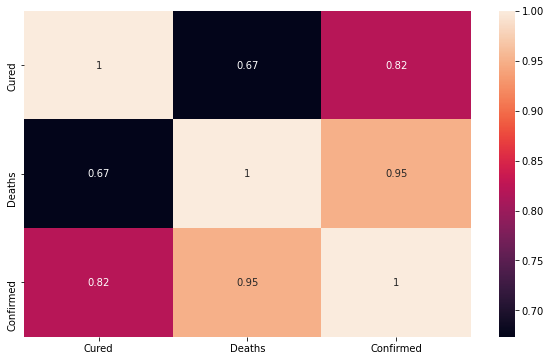

In [107]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True)

In [108]:
import seaborn
from matplotlib import pyplot

In [109]:
df1=df.head(5000)

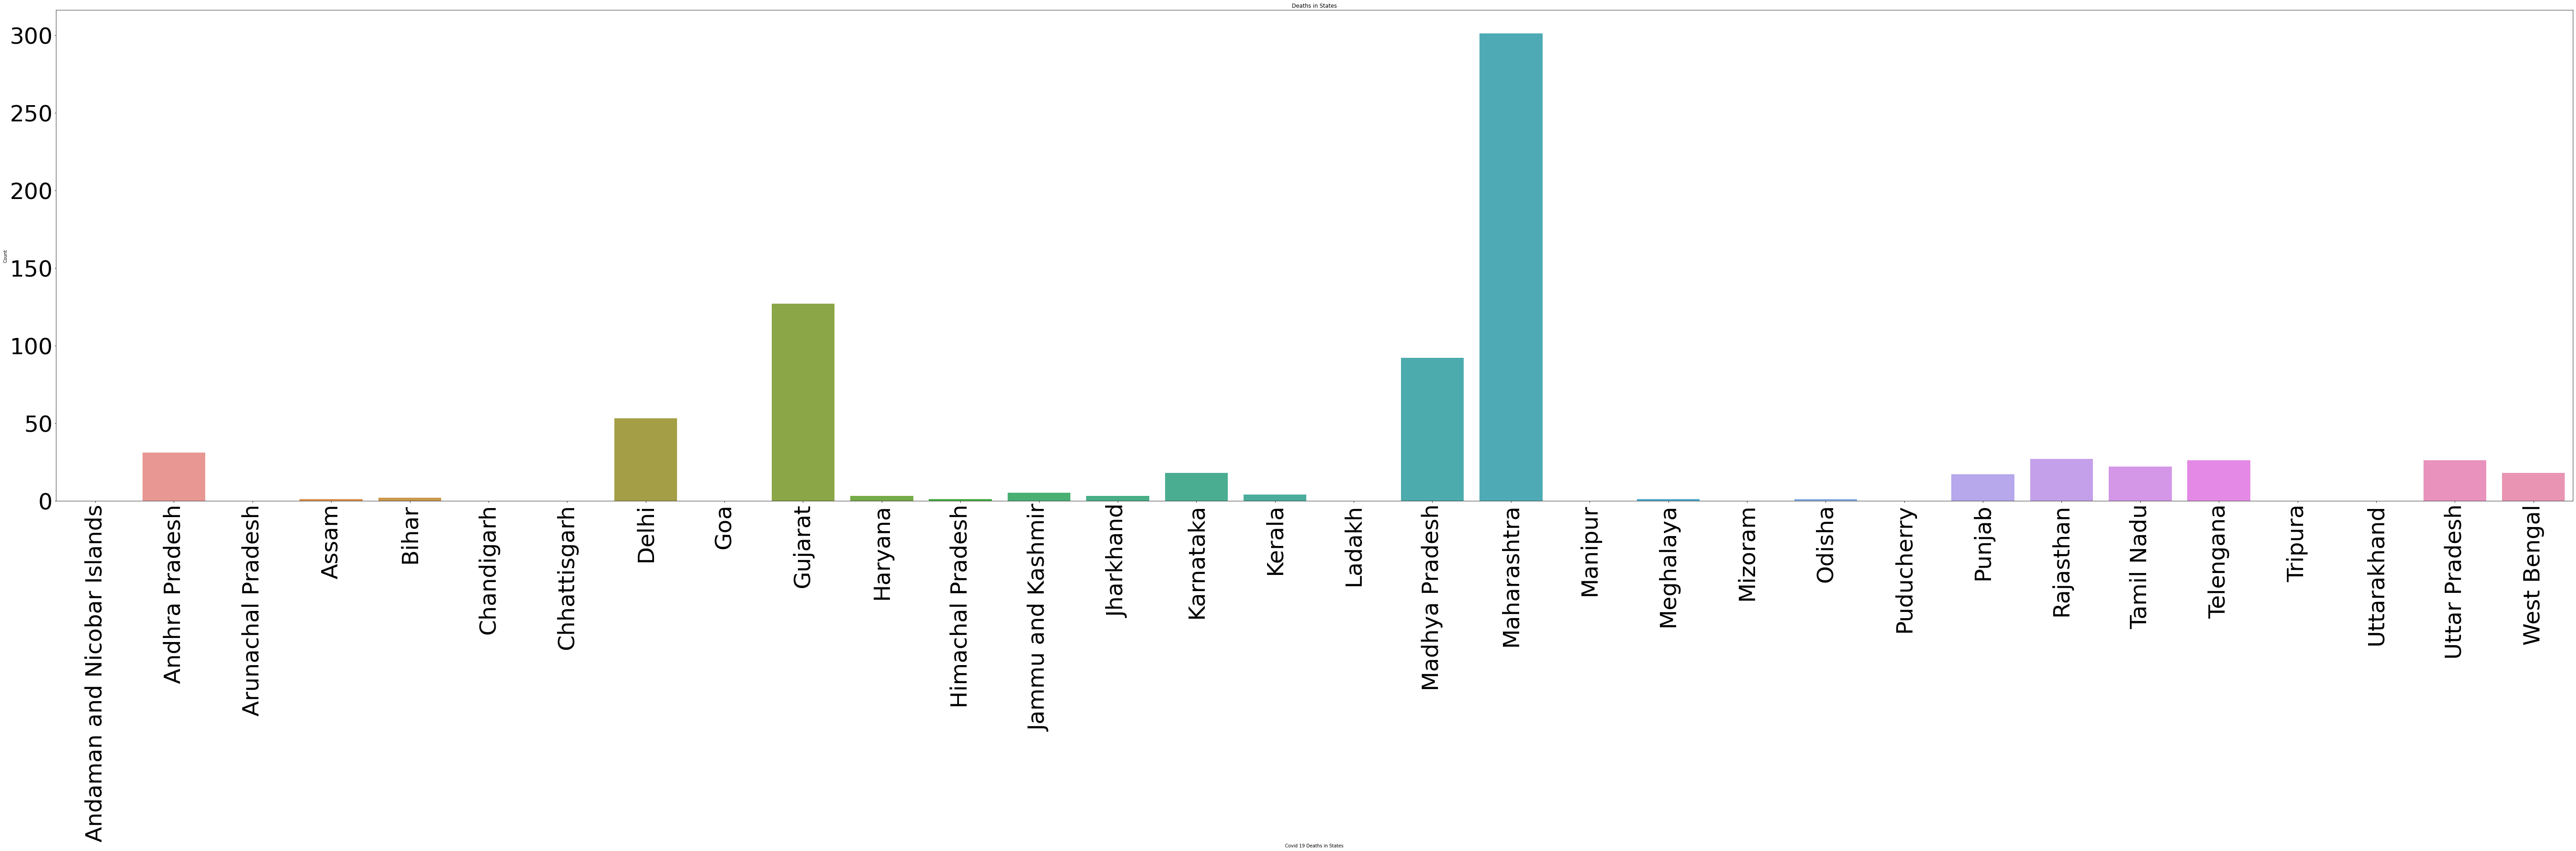

In [110]:
fig_dims = (100, 20)
fig, ax = pyplot.subplots(figsize=fig_dims)
plot = seaborn.barplot ( x = 'UnionTerritory', y = 'Deaths', ax=ax, data = df)
plot.axes.set_title("Deaths in States")
plot.set_xlabel("Covid 19 Deaths in States")
plot.set_ylabel("Count")
plot.tick_params(labelsize= 50)
ax.tick_params (axis = 'x', labelrotation = 90)


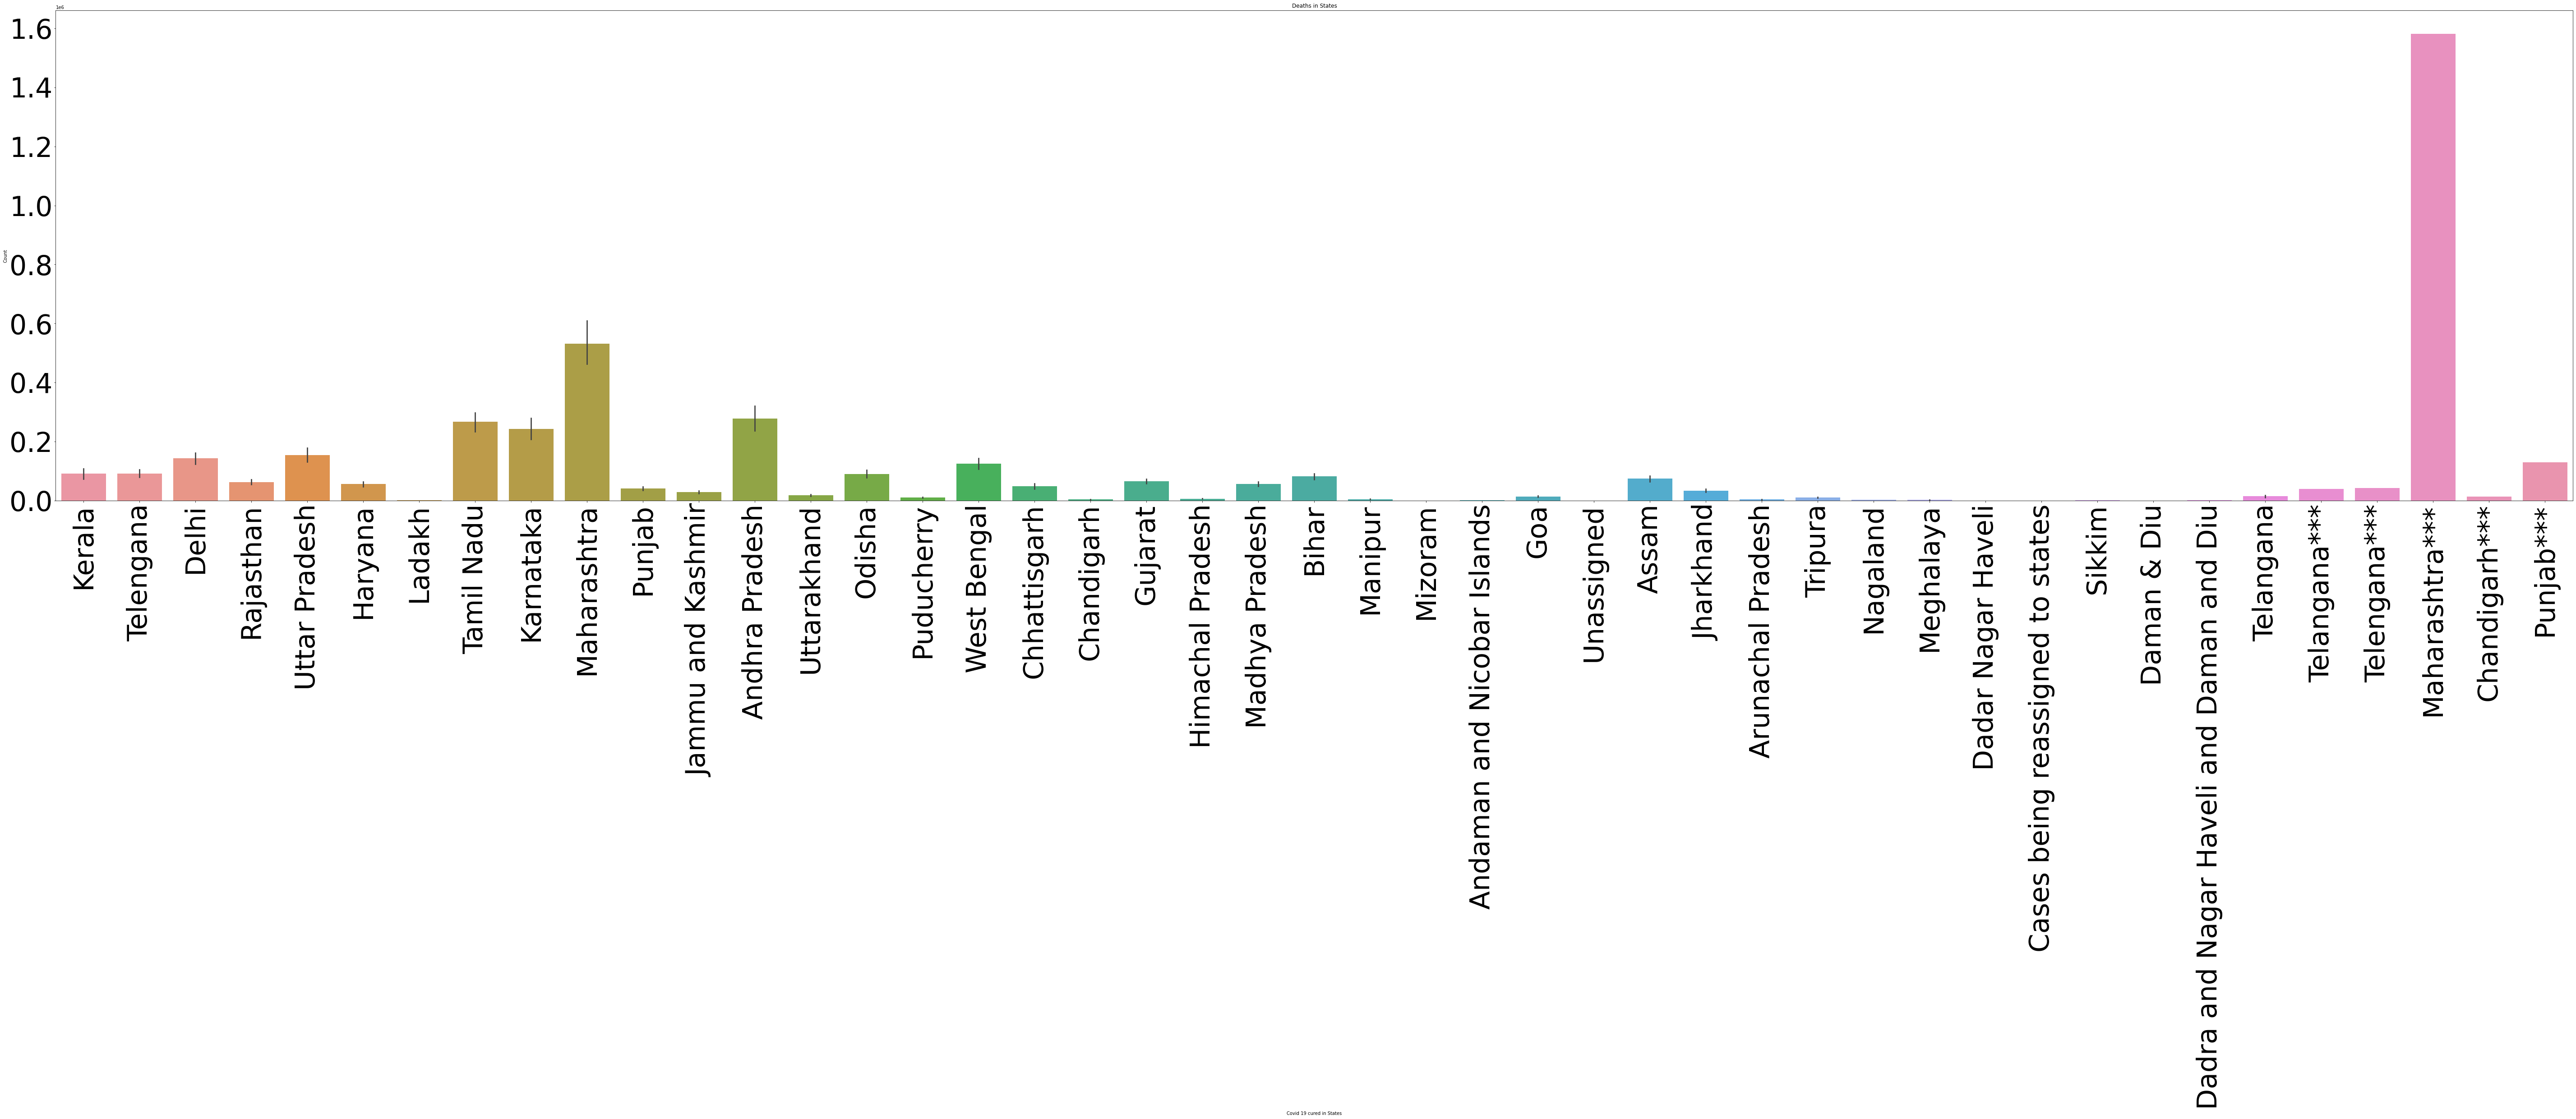

In [131]:
fig_dims = (100, 20)
fig, ax = pyplot.subplots(figsize=fig_dims)
plot = seaborn.barplot ( x = 'UnionTerritory', y = 'Cured', ax=ax, data = df)
plot.axes.set_title("Deaths in States")
plot.set_xlabel("Covid 19 cured in States")
plot.set_ylabel("Count")
plot.tick_params(labelsize= 60)
ax.tick_params (axis = 'x', labelrotation = 90)

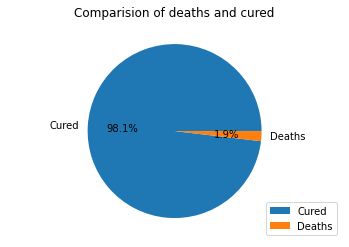

In [127]:
months  = df1 ['month'].tolist()
labels = ['Cured', 'Deaths']
salesData   = [df1 ['Cured'].sum(), df1 ['Deaths'].sum()]
plt.axis("equal")
plt.pie(salesData, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Comparision of deaths and cured')
plt.show()

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px